# GRIP:THE SPARKS FOUNDATION  
## Data Analysis & Business Analytics 
### NAME : Sahil B. Jethva
## Task 1: Prediction Using Supervised ML
What will be predicted score if a student studies for 9.25hrs/day?
* In these task, we have to predict the percentage of a student based on the no. of study hours. 
* This is a simple linear regression task as it involves just 2 variables.    
* DATASET - http://bit.ly/w-data

# Importing Necessary Libraries
* NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* Pandas is a library written for the Python programming language for data manipulation and analysis
* Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays.
* Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis.
* Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python.

In [3]:
import numpy as np
import matplotlib.pyplot as mplb
import pandas as pd
import seaborn as sb
sb.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Importing Data

In [4]:
url = 'http://bit.ly/w-data'
ds = pd.read_csv(url)
print("Data imported successfully")
ds.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Information of the DataSet 

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
print("Description of the Data")
ds.describe()

Description of the Data


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Analysis
* As we have only 2 variables for making prediction, Scatter plot is best choice for plotting 

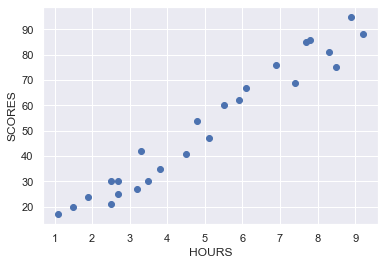

In [7]:
x = ds['Hours']
y = ds['Scores']
mplb.scatter(x,y)
mplb.xlabel('HOURS')
mplb.ylabel('SCORES')
mplb.show()

# Data Splitting
Dataset will be divided into two parts for the purpose of training and testing of the model.
* Train and Test data will be split into 80/20 as the test_size is kept 0.2
* Random_state is assigned to 0 but that is only for the purpose of getting same random number when we validate the program. But take into consideration that random_state should be assigned to some value otherwise there will be no random number generation.


In [8]:
x = ds.iloc[:, :-1].values
y = ds.iloc[:, 1].values

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

# Model Training

In [10]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print("model trained successfully")

model trained successfully


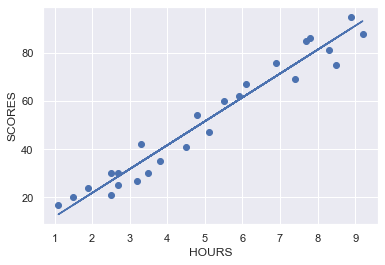

In [11]:
line = reg.coef_*x+reg.intercept_
mplb.scatter(x,y)
mplb.plot(x,line)
mplb.xlabel('HOURS')
mplb.ylabel('SCORES')
mplb.show()

In [12]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
y_predic = reg.predict(x_test)

In [14]:
ds = pd.DataFrame({'Actual': y_test, 'Prediction': y_predic})
ds

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Prediction of score for a specific amount of time


In [15]:
hours = [9.25]
prediction = reg.predict([hours])
print("If a student studies for {} hours/day, he/she has can score {:.2f}% in his/her exams.".format(hours[0], prediction[0]))

If a student studies for 9.25 hours/day, he/she has can score 93.69% in his/her exams.


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.
## MAE and R square
* Mean absolute error represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* R square also called co-efficient of Detemination which shows statistical measure of how close the data are to the fitted regression line.

In [16]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_predic))
print("Coefficient of Determination: {0} \nAccuracy in percentage:{1}".format(reg.score(x,y), reg.score(x,y)*100))

Mean Absolute Error: 4.183859899002975
Coefficient of Determination: 0.9526947647057274 
Accuracy in percentage:95.26947647057274
